# Part 1: EDA and Cleaning

- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

In [1]:
#import my CLEANED data into my a new notebook after eda cleaning  adn data cleaning 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [3]:
sample = pd.read_csv('../datasets/sample_sub_reg.csv')
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
sample.tail()

,Id,SalePrice
873,2919,181479.1217
874,2921,181479.1217
875,2922,181479.1217
876,2925,181479.1217
877,2928,181479.1217


In [5]:
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
test_df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
877,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


In [7]:
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
train_df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [9]:
train_df.shape, test_df.shape

((2051, 81), (878, 80))

In [10]:
#------------------ lets make my columns lower case and replace space with _
train_df.columns = train_df.columns.str.lower().str.replace(' ', '_')
test_df.columns = test_df.columns.str.lower().str.replace(' ','_')
#------------------------------------------------------------------

In [11]:
#--------set id to be the index for both dataframes
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace = True)
#----------------------------------------------

In [12]:
train_df.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   ms_zoning        2051 non-null   object 
 3   lot_frontage     1721 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   street           2051 non-null   object 
 6   alley            140 non-null    object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

## 1.1 Data Cleaning 

In [14]:
train_df.columns[train_df.isna().any()].tolist()

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [15]:
#==============================================DEAL WITH MISSING VALUES FIRST===========================================================
train_df.isnull().sum().sort_values(ascending = False)[:26]  #train dataset originally has 25 columns with missing values 

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
garage_area          1
garage_cars          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
dtype: int64

In [16]:
test_df.isnull().sum().sort_values(ascending = False)[:19]  #test data set originally has 18 columns of nulls

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
dtype: int64

In [17]:
train_df['mas_vnr_type']

id
109     BrkFace
544     BrkFace
153        None
318        None
255        None
         ...   
1587       None
785        None
916        None
639        None
10         None
Name: mas_vnr_type, Length: 2051, dtype: object

In [18]:
#lot frontage has empty cells..options I can do is delete empty rows or fill empty cells with the mean of the row
# more on it in my empty cells section:

In [19]:
test_df['lot_frontage'].mean()

69.54596100278552

In [20]:
#---------------for 'alley'  NA actually means  NA = no alley Access
train_df['alley'].unique(), test_df['alley'].unique()

(array([nan, 'Pave', 'Grvl'], dtype=object),
 array(['Grvl', nan, 'Pave'], dtype=object))

In [21]:
#train_df['alley'].replace('NA','NoAccess')   #nope tihs doesnt work
train_df['alley'].fillna('NoAccess', inplace = True)
test_df['alley'].fillna('NoAccess', inplace= True)

In [22]:
# ++will need to dummy.. 

In [23]:
#----------- for 'pool_qc' (pool quality)  NA actually means   NA = no pool

In [24]:
train_df['pool_qc'].unique(), test_df['pool_qc'].unique()

(array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object),
 array([nan, 'Ex', 'TA'], dtype=object))

In [25]:
train_df['pool_qc'].fillna('NoPool', inplace = True)
test_df['pool_qc'].fillna('NoPool', inplace = True)

In [26]:
# ++will neeed to dummy...also when dummifying need to manually add column series into test df bec train df has extra values.. i.e add a dummy column into test for Fa, Gd, 
set(train_df['pool_qc'].unique()) - set(test_df['pool_qc'].unique())

{'Fa', 'Gd'}

In [27]:
#-------------for 'misc_feature'  NA actually means   NA = no misc features

In [28]:
train_df['misc_feature'].unique(), test_df['misc_feature'].unique()

(array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object),
 array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object))

In [29]:
train_df['misc_feature'].fillna('No_Misc', inplace= True)
test_df['misc_feature'].fillna('No_Misc', inplace= True)

In [30]:
#  ++ will dumify this also.also when dummifying need to manually add column series into test df bec train df has extra values.
set(train_df['misc_feature'].unique()) - set(test_df['misc_feature'].unique())

{'Elev', 'TenC'}

In [31]:
#-------------for 'fence'  NA actually means   NA = no fence

In [32]:
train_df['fence'].unique(), test_df['fence'].unique()

(array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object),
 array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object))

In [33]:
train_df['fence'].fillna('NoFence', inplace= True)
test_df['fence'].fillna('NoFence', inplace= True)

In [34]:
# ++ will need to dummify aslo

In [35]:
#-------------for 'fireplace_qu' (fireplace quality) NA actually means   NA = no fire place

In [36]:
train_df['fireplace_qu'].unique(), test_df['fireplace_qu'].unique()

(array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object),
 array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object))

In [37]:
train_df['fireplace_qu'].fillna('No_Fireplace', inplace= True)
test_df['fireplace_qu'].fillna('No_Fireplace', inplace= True)

In [38]:
# ++ dumify later...

In [39]:
#-------------for 'garage_cond' (garage condition) NA actually means   NA = no garage

In [40]:
train_df['garage_cond'].unique(), test_df['garage_cond'].unique()

(array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'TA', nan, 'Fa', 'Gd', 'Ex'], dtype=object))

In [41]:
train_df['garage_cond'].fillna('No_Gar', inplace= True)
test_df['garage_cond'].fillna('No_Gar', inplace= True)

# ++ need to dumify also

In [42]:
#-------------for 'qual' (garage quality) NA actually means   NA = no garage
train_df['garage_qual'].unique(), test_df['garage_qual'].unique()

(array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object),
 array(['Po', 'TA', 'Fa', nan, 'Gd'], dtype=object))

In [43]:
train_df['garage_qual'].fillna('No_Gar', inplace= True)
test_df['garage_qual'].fillna('No_Gar', inplace= True)

# ++ need to dumify also... also when dummifying need to manually add column series into test df bec train df has extra values.
set(train_df['garage_qual'].unique()) - set(test_df['garage_qual'].unique())

{'Ex'}

In [44]:
#-------------for 'garage_finish' (garage finish) NA actually means   NA = no garage
train_df['garage_finish'].unique(), test_df['garage_finish'].unique()

(array(['RFn', 'Unf', 'Fin', nan], dtype=object),
 array(['Unf', 'Fin', 'RFn', nan], dtype=object))

In [45]:
train_df['garage_finish'].fillna('No_Gar', inplace= True)
test_df['garage_finish'].fillna('No_Gar', inplace= True)

# ++ need to dumify also

In [46]:
#-------------for 'garage_finish' (garage finish) NA actually means   NA = no garage
train_df['garage_yr_blt'].sort_values(ascending=False).unique(), test_df['garage_yr_blt'].sort_values(ascending=False).unique()

     #**********for train_df there is a value that has the year 2207... which doesnt make sense********************
    #********* need to think on this one.. set the null values to 0 technicallly because they were never built.. garage doesnt come with the home***

(array([2207., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
        2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994.,
        1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
        1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
        1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967.,
        1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958.,
        1957., 1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949.,
        1948., 1947., 1946., 1945., 1942., 1941., 1940., 1939., 1938.,
        1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
        1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
        1919., 1918., 1917., 1916., 1915., 1914., 1910., 1900., 1896.,
        1895.,   nan]),
 array([2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
        2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
        1992., 1991., 1990., 1989., 1988., 1987., 198

In [47]:
#drop the year 2207 in the train_df:
#train_df.drop(train_df.index[train_df['garage_yr_blt'] < 2015], inplace= True)  #this line drops everything before 2015

train_df.drop(train_df.index[train_df['garage_yr_blt'] > 2015], inplace = True)  #drop the rows in garage_yr_blt greater then 2015.. why did i brain fart here


In [48]:
train_df['garage_yr_blt'].fillna(0 , inplace= True)
test_df['garage_yr_blt'].fillna(0 , inplace= True)
#I should comeback to this later and instead fill it with maybe the mean of the year.. though it still doesnt make sense bec the garage was never built


# -dont have to dumify.... uugh maybe i do?

In [49]:
#-------------for 'garage_type'  NA actually means   NA = no garage
train_df['garage_type'].unique(), test_df['garage_type'].unique()

(array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
       dtype=object),
 array(['Detchd', 'Attchd', 'BuiltIn', nan, '2Types', 'CarPort', 'Basment'],
       dtype=object))

In [50]:
train_df['garage_type'].fillna('No_Gar' , inplace= True)
test_df['garage_type'].fillna('No_Gar' , inplace= True)

# ++ need to dumify also....

In [51]:
#-------------for 'bsmt_exposure'  NA actually means   NA = no basement
train_df['bsmt_exposure'].unique(), test_df['bsmt_exposure'].unique()

(array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object),
 array(['No', 'Av', nan, 'Mn', 'Gd'], dtype=object))

In [52]:
train_df['bsmt_exposure'].fillna('NoBsmt' , inplace= True)
test_df['bsmt_exposure'].fillna('NoBsmt' , inplace= True)

# ++ need to dumify also

In [53]:
#-------------for 'bsmtfin_type_1' (quality of basement finished area)  NA actually means   NA = no basement
train_df['bsmtfin_type_1'].unique(), test_df['bsmtfin_type_1'].unique()

(array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object),
 array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ'], dtype=object))

In [54]:
train_df['bsmtfin_type_1'].fillna('NoBsmt' , inplace= True)
test_df['bsmtfin_type_1'].fillna('NoBsmt' , inplace= True)

# ++ need to dumify also

In [55]:
#-------------for 'bsmtfin_type_1' (quality of 2nd basement finished area)  NA actually means   NA = no basement
train_df['bsmtfin_type_2'].unique(), test_df['bsmtfin_type_2'].unique()

(array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object),
 array(['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ'], dtype=object))

In [56]:
train_df['bsmtfin_type_2'].fillna('NoBsmt' , inplace= True)
test_df['bsmtfin_type_2'].fillna('NoBsmt' , inplace= True)

# ++ need to dumify also

In [57]:
#-------------for 'bsmt_cond' (basement condition)  NA actually means   NA = no basement
train_df['bsmt_cond'].unique(), test_df['bsmt_cond'].unique()

(array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object),
 array(['TA', 'Gd', nan, 'Fa'], dtype=object))

In [58]:
train_df['bsmt_cond'].fillna('NoBsmt' , inplace= True)
test_df['bsmt_cond'].fillna('NoBsmt' , inplace= True)

# ++ need to dumify also...also when dummifying need to manually add column series into test df bec train df has extra values.
set(train_df['bsmt_cond'].unique()) - set(test_df['bsmt_cond'].unique())

{'Ex', 'Po'}

In [59]:
#-------------for 'bsmt_qual' (basement quality..height of the basement)  NA actually means   NA = no basement
train_df['bsmt_qual'].unique(), test_df['bsmt_qual'].unique()

(array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object),
 array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object))

In [60]:
train_df['bsmt_qual'].fillna('NoBsmt' , inplace= True)
test_df['bsmt_qual'].fillna('NoBsmt' , inplace= True)

# ++ need to dumify also

In [61]:
#------- These upcoming cells have empty cells--------------------
#----------------------

In [62]:
empty_train = train_df.columns[train_df.isna().any()].tolist()
empty_train

['lot_frontage',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'garage_cars',
 'garage_area']

In [63]:
empty_test = test_df.columns[test_df.isna().any()].tolist()
empty_test  # DO NOT DELETE ROWS / COLUMNS OF THE TEST DATASET!!!!

['lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 'electrical']

In [64]:
#-------------for 'mas_vnr_type' (Massonry Veneer Type)  NA/empty cells?? actually means might mean none??? or should we remove??------------**********************************
  ## is it our choice?? ask office hours!!...... Yep its a choice to remove or do w/e with it like putting the mean of the column into those cells
train_df['mas_vnr_type'].unique(), test_df['mas_vnr_type'].unique()

(array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object),
 array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan], dtype=object))

In [65]:
train_df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [66]:
# -------------  ???????? for the empty cells.. i guess we cna decide to remove it****************************************
train_df['electrical'].unique(), test_df['electrical'].unique()

(array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object),
 array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object))

In [67]:
test_df.loc[test_df['electrical'].isnull(), :]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
1578,916386080,80,RL,73.0,9735,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,5,2008,WD


In [68]:
#--------- ***************** too remove them bec empty cells??? .... oh okay i cna play around wiht it and drop it .. its empty
train_df['bsmt_half_bath'].unique(), train_df['bsmt_full_bath'].unique()

(array([ 0.,  1., nan,  2.]), array([ 0.,  1.,  2., nan,  3.]))

In [69]:
train_df.loc[train_df['bsmt_half_bath'].isnull(), 'bsmt_half_bath' : ]

,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1498,NaN,3,1,5,1,Ex,11,Typ,2,Gd,...,0,0,NoPool,NoFence,No_Misc,0,7,2008,WD,284700
1342,NaN,1,0,2,1,TA,4,Typ,0,No_Fireplace,...,0,0,NoPool,MnPrv,No_Misc,0,4,2008,ConLD,79000


In [70]:
train_df.loc[train_df['bsmt_full_bath'].isnull(), 'bsmt_full_bath':]

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1498,NaN,NaN,3,1,5,1,Ex,11,Typ,2,...,0,0,NoPool,NoFence,No_Misc,0,7,2008,WD,284700
1342,NaN,NaN,1,0,2,1,TA,4,Typ,0,...,0,0,NoPool,MnPrv,No_Misc,0,4,2008,ConLD,79000


In [71]:
# ------------------  Going to drop these empty cells for now FOR TEST DF... comeback to it later to optimize a better score 

train_df.dropna(inplace = True)

In [72]:
test_df['lot_frontage'].mean()

69.54596100278552

In [73]:
test_df['lot_frontage'].fillna(test_df['lot_frontage'].mean(), inplace = True)#lets set the null values of lot frontage for test_df to the mean of the column

In [74]:
test_df['electrical'].fillna(0, inplace= True)   #electrical column cellls are strings..cant get the mean of that.. will set to 0 for now

In [75]:
test_df['mas_vnr_type'].fillna(0, inplace = True)   #same for mas_vnr_type .. set to 0
test_df['mas_vnr_area'].fillna(0, inplace = True)   #same for mas_vnr_area .. set to 0

In [76]:
#test_df['central_air'].fillna(0, inplace = True)   #same for Central Air .. acutally this one is easier.. its just Y or N... can try having it set to 1== Y and 0 ==N

In [77]:
# for x in test_df['central_air'][:10]:
#     print(x)

In [78]:
test_df['central_air'].unique()

array(['N', 'Y'], dtype=object)

In [79]:
test_df['central_air'] = [1 if x == 'Y' else 0  for x in test_df['central_air']]
test_df['central_air']

id
2658    0
2718    1
2414    1
1989    1
625     1
       ..
1662    1
1234    1
1373    1
1672    1
1939    1
Name: central_air, Length: 878, dtype: int64

In [80]:
## lets do the same for central_air on train_df
train_df['central_air'].unique()

array(['Y', 'N'], dtype=object)

In [81]:
train_df['central_air'] = [1 if x == 'Y' else 0  for x in train_df['central_air']]
train_df['central_air']

id
544     1
153     1
318     1
255     1
138     1
       ..
1051    1
1587    1
916     1
639     1
10      1
Name: central_air, Length: 1702, dtype: int64

In [82]:
test_df.isnull().sum().sort_values(ascending=False)

pid             0
half_bath       0
fireplace_qu    0
fireplaces      0
functional      0
               ..
mas_vnr_type    0
exterior_2nd    0
exterior_1st    0
roof_matl       0
sale_type       0
Length: 79, dtype: int64

In [83]:
train_df.isnull().sum().sort_values(ascending=False)

pid             0
ms_subclass     0
garage_type     0
fireplace_qu    0
fireplaces      0
               ..
mas_vnr_type    0
exterior_2nd    0
exterior_1st    0
roof_matl       0
saleprice       0
Length: 80, dtype: int64

In [84]:
#===========================================MISSING VALUES SECTION END==========================================================

In [85]:
test_df.shape

(878, 79)

In [86]:
train_df.shape

(1702, 80)

In [87]:
#train_df.columns.intersection(test_df.columns)

#No 'Sales Price' columns in test_df

#we want to predict the 'Sales Price' on the test set 

In [88]:
# count = 0
# for x in train_df.columns:
#     count = count + 1
#     print(f'Columns {count}: {x}')
    
 #I dont need ID related columns really :
#id, pid,


#maybe need ID tobe set to my index

In [89]:
train_df.head(5)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
544,531379050,60,RL,43.0,11492,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,3,2010,WD,138500
138,535126040,20,RL,137.0,16492,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,6,2010,WD,190000


In [90]:
test_df.head(5)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,4,2006,WD
2718,905108090,90,RL,69.545961,9662,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,8,2006,WD
2414,528218130,60,RL,58.000000,17104,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,9,2006,New
1989,902207150,30,RM,60.000000,8520,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,7,2007,WD
625,535105100,20,RL,69.545961,9500,Pave,NoAccess,IR1,Lvl,AllPub,...,0,185,0,NoPool,NoFence,No_Misc,0,7,2009,WD


In [91]:
train_df.dtypes

pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 80, dtype: object

In [92]:
#train_df['id'].unique().shape  #okay their are 2051 ids NO CLONES !!

In [93]:
train_df.sort_values(by='id').head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,5,2010,WD,215000
3,526351010,20,RL,81.0,14267,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,Gar2,12500,6,2010,WD,172000
5,527105010,60,RL,74.0,13830,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,MnPrv,No_Misc,0,3,2010,WD,189900
8,527145080,120,RL,43.0,5005,Pave,NoAccess,IR1,HLS,AllPub,...,144,0,NoPool,NoFence,No_Misc,0,1,2010,WD,191500
9,527146030,120,RL,39.0,5389,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,3,2010,WD,236500


In [94]:
train_df.describe()

,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,1.702000e+03,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.00000,...,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000
mean,7.159840e+08,57.602820,68.960047,9597.624559,6.099295,5.564630,1970.625734,1984.081669,97.111633,423.13631,...,90.259107,46.323737,22.967685,2.470035,16.458872,2.455934,50.487074,6.212103,2007.782609,179588.648061
std,1.886815e+08,43.783575,23.218783,4929.302286,1.456042,1.105911,31.453825,21.524956,176.018025,466.26267,...,123.829245,66.223690,59.912238,24.858849,57.245013,37.431530,588.861453,2.755619,1.322612,82234.311522
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284771e+08,20.000000,58.000000,7288.500000,5.000000,5.000000,1950.000000,1963.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,128000.000000
50%,5.354571e+08,50.000000,68.000000,9233.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,335.50000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157700.000000
75%,9.071811e+08,70.000000,80.000000,11070.000000,7.000000,6.000000,2003.000000,2004.000000,148.000000,700.00000,...,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209925.000000
max,9.241520e+08,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.00000,...,870.000000,547.000000,432.000000,508.000000,480.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## 1.2 EDA & Exploratory Anaylsis

In [95]:
# Project said to try plotting this to see any  outliers

Text(0, 0.5, 'GrLivArea')

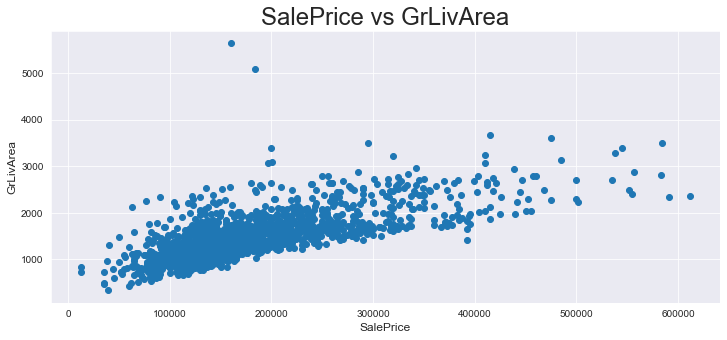

In [96]:
plt.figure(figsize=(12,5))
plt.scatter(train_df['saleprice'], train_df['gr_liv_area'])
plt.title('SalePrice vs GrLivArea', size = 24)
plt.xlabel('SalePrice', size = 12)
plt.ylabel('GrLivArea', size = 12)
#a few outliers for gr_liv_area above 4k.. lets remove them

We can tell there are a few datapoints that are very far away from the cluster of data points.
We will be box plotting these two variables too look at them closely.

In [97]:
#if i do a boxplot of the salesprice.. i will see quite a few outliers   EDA!!!!!!!!!!!!!!!!!!!!!!!!!

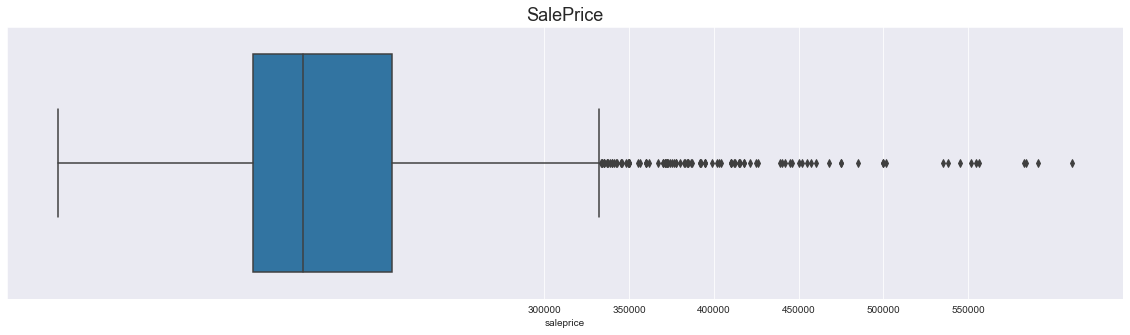

In [98]:
plt.figure(figsize=(20,5))
sns.boxplot(x = train_df['saleprice'])   #quite a lot of outliers after 320,000 ... lets remove em 
plt.title('SalePrice', size = 18)
plt.xticks(range(300_000, 600_000, 50_000));

**We have many outliers for saleprice that are beyond 320k. For now, I am going to remove outliers greater then or equal to 500k**

In [99]:
train_df.loc[train_df['saleprice'] >= 500_000, :]; #looking at the data with 500k+

In [100]:
mask = train_df['saleprice'] < 500_000
train_df = train_df[mask]

In [101]:
train_df.shape

(1689, 80)

Text(0.5, 1.0, 'GrLivArea')

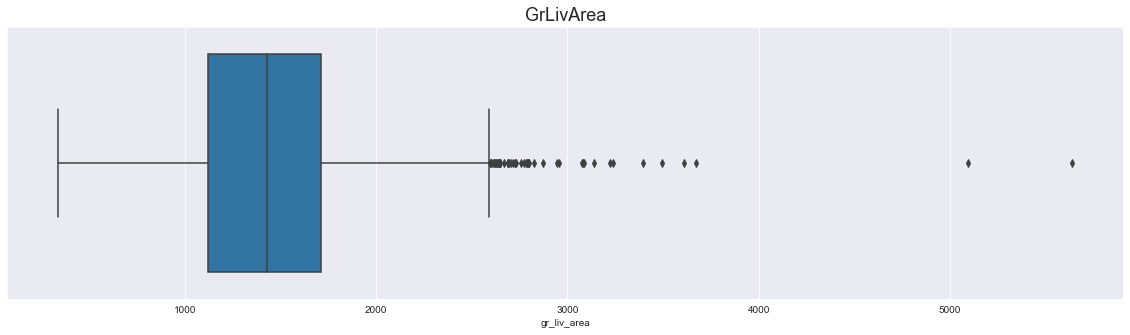

In [102]:
plt.figure(figsize=(20,5))
sns.boxplot(x = train_df['gr_liv_area']);  #gr_liv_area.. good amoung of outliers.. lets remove the ones beyond 5k
plt.title('GrLivArea', size = 18)

In [103]:
# plt.figure(figsize=(20,5))
# sns.boxplot(x = test_df['gr_liv_area']);

**We have outliers in the train_df for 'gr_liv_area' which are above 2500.  The outliers that are really far off are the ones beyond 5k.**

In [104]:
mask = train_df['gr_liv_area'] < 4000
train_df = train_df[mask]

In [105]:
train_df.shape

(1687, 80)

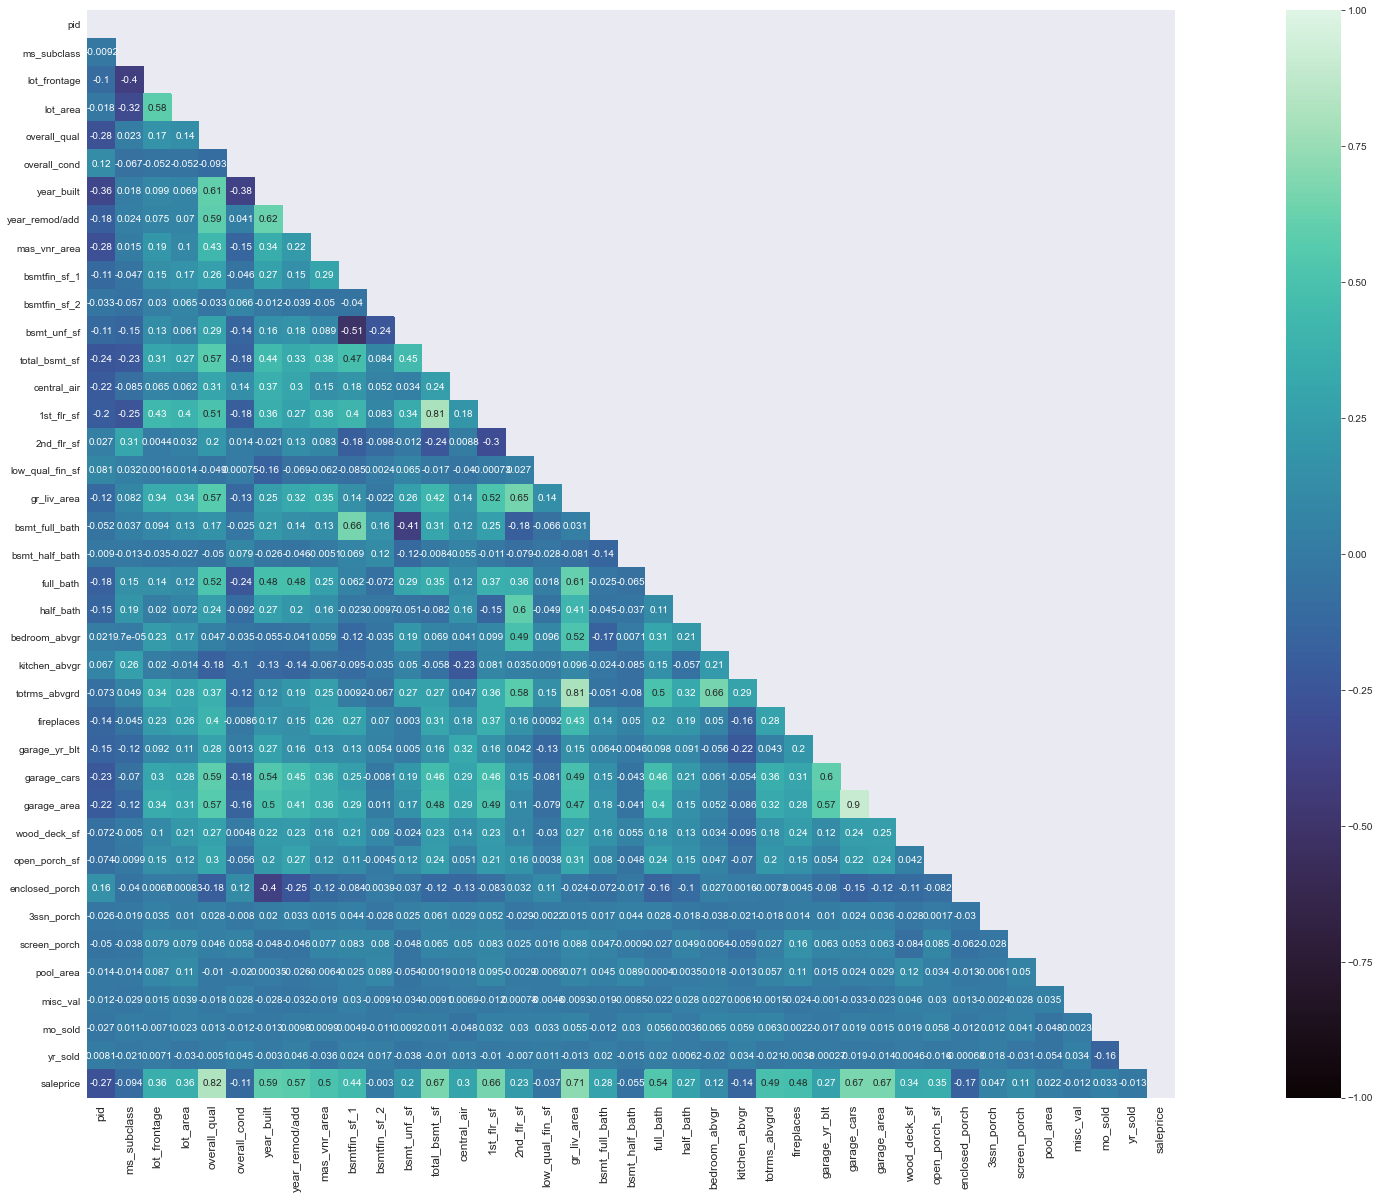

In [106]:
#heatmap
plt.figure(figsize=(40,20))

corr = train_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True,
           mask = mask,
           vmax= 1, vmin= -1,
           square = True,
           cmap = 'mako');
plt.xticks(rotation = 90, size = 12);

From my heatmap, whats noticeably relatable or inversely relable are:
 
 -gr_liv_area  and totrms_abvgr are relatable
 
 -garage_cars and garage_area
 
 -saleprice and overall_qual 
 
 -bsmtfin_sf_1 and bsmt_unf_sf (inverse)

In [107]:
#train_df_final.select_dtypes(exclude='object').drop(columns='saleprice').columns.to_list() 

In [108]:
#Lets do an OLS  model to see what varaibles to put for our features to predict saleprice
from scipy import stats
import statsmodels.api as sm


features = train_df.select_dtypes(exclude='object').drop(columns=['saleprice', 'pid']).columns.to_list()
    #Im going to make my columns names into a list and exclude saleprice and pid to pass in as my features

In [109]:
features

['ms_subclass',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'central_air',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold']

In [110]:
# X = [features]
# y = train_df['saleprice']

# X = sm.add_constant(X, prepend=True)
# results = sm.OLS(y, X).fit()   # reminder OLS  stats modles only take values that are int/float type .. not obj!
#  ^^ this line im getting an error  : TypeError: cannot perform reduce with flexible type
#all the columns are not object type ... but the next line of codes work

In [111]:
from sklearn.linear_model import LinearRegression

#dont sleep on statsmodels   as chuck said
from statsmodels.api import OLS

In [112]:
model = OLS(train_df['saleprice'], train_df[features]).fit()

In [113]:
model.summary()
#if P >|t|  < 0.05 then that feature likely predicts y!

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2859.
Date:                Sat, 22 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:31:57   Log-Likelihood:                         -19444.
No. Observations:                1687   AIC:                                  3.896e+04
Df Residuals:                    1652   BIC:                                  3.915e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ms_subclass      -104.0844     17.879     -5.821      0.000    -139.153     -69.016
lot_frontage       35.2451     37.639      0.936      0.349     -38.580     109.070
lot_area            1.1972      0.180      6.636      0.000       0.843       1.551
overall_qual     1.521e+04    769.224     19.778      0.000    1.37e+04    1.67e+04
overall_cond     4836.2782    709.235      6.819      0.000    3445.184    6227.373
year_built        393.5531     39.805      9.887      0.000     315.480     471.627
year_remod/add    201.8558     44.002      4.587      0.000     115.550     288.161
mas_vnr_area       29.9437      4.337      6.905      0.000      21.438      38.450
bsmtfin_sf_1       19.6218      1.755     11.180      0.000      16.179      23.064
bsmtfin_sf_2       -0.7721      3.060     -0.252      0.801      -6.775       5.231
bsmt_unf_sf        -1.8441      1.598     -1.154      0.249      -4.978       1.290
total_bsmt_sf      17.0057      2.328      7.304      0.000      12.439      21.572
central_air     -7494.7144   2742.442     -2.733      0.006   -1.29e+04   -2115.686
1st_flr_sf         23.1102      3.957      5.840      0.000      15.349      30.871
2nd_flr_sf         22.7996      3.534      6.452      0.000      15.868      29.731
low_qual_fin_sf    -8.4571      8.973     -0.942      0.346     -26.057       9.143
gr_liv_area        37.4526      3.630     10.319      0.000      30.334      44.572
bsmt_full_bath   2446.2540   1731.815      1.413      0.158    -950.530    5843.038
bsmt_half_bath  -2632.6031   2568.677     -1.025      0.306   -7670.808    2405.602
full_bath       -1979.8328   1849.578     -1.070      0.285   -5607.597    1647.931
half_bath       -1901.7739   1829.893     -1.039      0.299   -5490.927    1687.379
bedroom_abvgr   -8902.1758   1121.577     -7.937      0.000   -1.11e+04   -6702.314
kitchen_abvgr   -1.338e+04   3644.185     -3.671      0.000   -2.05e+04   -6229.681
totrms_abvgrd    1815.3223    844.807      2.149      0.032     158.317    3472.328
fireplaces       3725.5584   1219.461      3.055      0.002    1333.707    6117.410
garage_yr_blt     -10.4568      1.769     -5.910      0.000     -13.928      -6.986
garage_cars      3088.6616   2036.795      1.516      0.130    -906.310    7083.633
garage_area        34.2032      6.889      4.965      0.000      20.692      47.714
wood_deck_sf       11.2252      5.578      2.012      0.044       0.284      22.167
open_porch_sf      12.9975     10.265      1.266      0.206      -7.136      33.131
enclosed_porch      7.2542     11.174      0.649      0.516     -14.663      29.171
3ssn_porch         30.5769     24.399      1.253      0.210     -17.280      78.434
screen_porch       42.8195     11.287      3

- Prob(f_stat) is less then 0.01! So there are atleast one feature or more to predict y
- We can see that many of our features can predict SalePrice but the ones that are not likely (their p-value isn't less then 0.05... P>|t| > 0.05): 
**bsmtfin_sf_2, central_air, low_qual_fin_sf,   mo_sold, 3ssn_porch, enclosed_porch, open_porch_sf, half_bath, full_bath, bsmt_half_bath**

In [114]:
#train_df.loc[:,['bsmntfin_sf_2', 'central_air', 'low_qual_fin_sf', 'mo_sold', '3ssn_porch', 
 #               'enclosed_porch', 'open_porch_sf', 'half_bath', 'full_bath', 'bsmt_half_bath']];

In [115]:
#rain_df[['half_bath', 'central_air']]

In [125]:
#I will exclude these out of my features when I really want to optimize my model in the next section!  bec their p-values are greater then 0.05
# train_df[['bsmtfin_sf_2'  , 'central_air'    , 'low_qual_fin_sf'   , 'mo_sold'   , '3ssn_porch'   , 
#                 'enclosed_porch',            'open_porch_sf',        'half_bath',       'full_bath',      'bsmt_half_bath',
#          'lot_frontage', 'bsmt_unf_sf', 'misc_val', 'garage_cars', 'bsmt_full_bath' ]]

train_df[['lot_frontage', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'central_air',
         'low_qual_fin_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
         'garage_cars', 'open_porch_sf','enclosed_porch','3ssn_porch', 'misc_val', 'mo_sold']]

,lot_frontage,bsmtfin_sf_2,bsmt_unf_sf,central_air,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,garage_cars,open_porch_sf,enclosed_porch,3ssn_porch,misc_val,mo_sold
id,,,,,,,,,,,,,,,
544,43.0,0.0,276.0,1,0,1.0,0.0,2,1,2.0,74,0,0,0,4
153,68.0,0.0,326.0,1,0,1.0,0.0,1,0,1.0,52,0,0,0,1
318,73.0,0.0,384.0,1,0,0.0,0.0,2,1,2.0,0,0,0,0,4
255,82.0,0.0,676.0,1,0,0.0,0.0,2,0,2.0,59,0,0,0,3
138,137.0,713.0,557.0,1,0,0.0,0.0,2,1,2.0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,96.0,0.0,596.0,1,0,1.0,0.0,2,0,3.0,66,0,304,0,11
1587,79.0,0.0,873.0,1,0,1.0,0.0,2,0,2.0,276,0,0,0,1
916,57.0,0.0,896.0,1,0,0.0,0.0,1,1,2.0,0,0,0,0,3


In [117]:
# I might try making interaction terms out of these features i am going to take out instead.. remember save it also into your test dataframe!!

Text(0, 0.5, 'Lot Area')

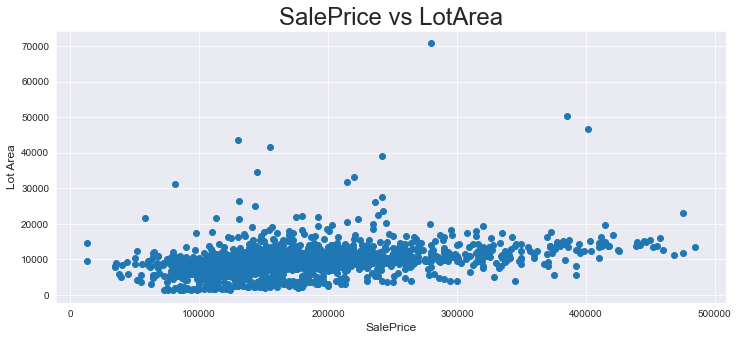

In [118]:
plt.figure(figsize=(12,5))
plt.scatter(train_df['saleprice'], train_df['lot_area'])
plt.title('SalePrice vs LotArea', size = 24)
plt.xlabel('SalePrice', size = 12)
plt.ylabel('Lot Area', size = 12)

Quite a few outliers beyond 30,000

In [119]:
#Few extra features I want to look at

Text(0.5, 1.0, 'Lot Area')

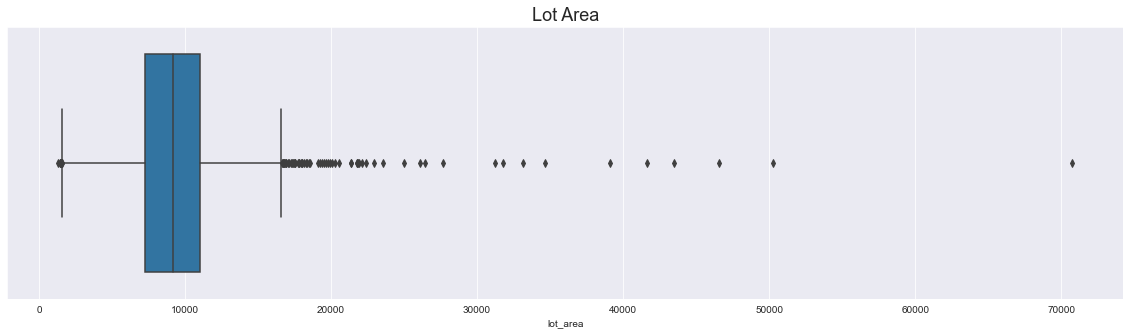

In [120]:
plt.figure(figsize=(20,5))
sns.boxplot(x = train_df['lot_area']);
plt.title('Lot Area', size = 18)

In [121]:
train_df.loc[train_df['lot_area'] > 30000,'lot_area':].sort_values(by=['lot_area'],ascending=False)

,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2767,70761,Pave,NoAccess,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,...,0,0,NoPool,NoFence,No_Misc,0,12,2006,WD,280000
2523,50271,Pave,NoAccess,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,...,0,0,NoPool,NoFence,No_Misc,0,11,2006,WD,385000
505,46589,Pave,NoAccess,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,0,0,NoPool,NoFence,No_Misc,0,7,2009,WD,402000
2279,43500,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,...,0,561,TA,GdPrv,No_Misc,0,6,2007,WD,130000
1639,41600,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,...,0,0,NoPool,NoFence,No_Misc,0,11,2007,WD,155000
1402,39104,Pave,NoAccess,IR1,Low,AllPub,CulDSac,Sev,ClearCr,Norm,...,0,0,NoPool,NoFence,No_Misc,0,4,2008,WD,241500
2339,34650,Pave,NoAccess,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,NoPool,NoFence,No_Misc,0,1,2006,WD,145000
2687,33120,Pave,NoAccess,IR3,Lvl,AllPub,Inside,Gtl,OldTown,RRAn,...,0,0,NoPool,NoFence,No_Misc,0,10,2006,WD,220000
1,31770,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0,0,NoPool,NoFence,No_Misc,0,5,2010,WD,215000


In [122]:
#In the train_df going to remove outliers above 30k for lot_area
mask2 = train_df['lot_area'] < 30000
train_df = train_df[mask2]

In [123]:
train_df.shape

(1677, 80)

In [124]:
test_df.to_csv('../datasets/test_v2.csv')
train_df.to_csv('../datasets/train_v2.csv')